In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Vegetable_Images/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 15000 files belonging to 15 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Vegetable_Images/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3000 files belonging to 15 classes.


In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=15,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
469/469 [==============================] - 2449s 5s/step - loss: 2.8847 - accuracy: 0.2333 - val_loss: 1.9526 - val_accuracy: 0.3393
Epoch 2/5
469/469 [==============================] - 336s 715ms/step - loss: 1.4964 - accuracy: 0.4827 - val_loss: 1.1852 - val_accuracy: 0.6117
Epoch 3/5
469/469 [==============================] - 333s 708ms/step - loss: 1.0386 - accuracy: 0.6531 - val_loss: 0.7768 - val_accuracy: 0.7453
Epoch 4/5
469/469 [==============================] - 338s 718ms/step - loss: 0.7108 - accuracy: 0.7743 - val_loss: 0.5107 - val_accuracy: 0.8327
Epoch 5/5
469/469 [==============================] - 333s 709ms/step - loss: 0.5114 - accuracy: 0.8367 - val_loss: 0.3849 - val_accuracy: 0.8833


In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [8]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

469/469 [==============================] - 91s 194ms/step - loss: 0.1993 - accuracy: 0.9369
Training accuracy: 0.9368666410446167


In [9]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

94/94 [==============================] - 28s 289ms/step - loss: 0.3849 - accuracy: 0.8833
Validation accuracy: 0.8833333253860474


In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
training_history.history

{'loss': [2.884690046310425,
  1.4963600635528564,
  1.0385557413101196,
  0.710802435874939,
  0.5113656520843506],
 'accuracy': [0.2332666665315628,
  0.4827333390712738,
  0.6530666947364807,
  0.7743333578109741,
  0.836733341217041],
 'val_loss': [1.9525753259658813,
  1.1852376461029053,
  0.7767747640609741,
  0.510698676109314,
  0.3849324882030487],
 'val_accuracy': [0.33933332562446594,
  0.6116666793823242,
  0.7453333139419556,
  0.8326666951179504,
  0.8833333253860474]}

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [11]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [12]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 88.33333253860474 %


In [13]:
training_history.history['accuracy']

[0.2332666665315628,
 0.4827333390712738,
 0.6530666947364807,
 0.7743333578109741,
 0.836733341217041]

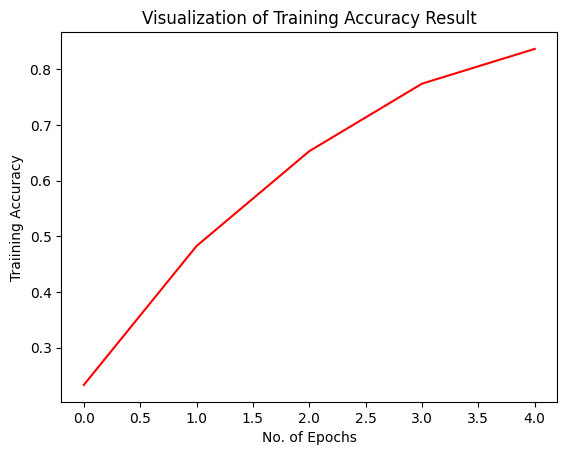

In [14]:
epochs = [i for i in range(0,5)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

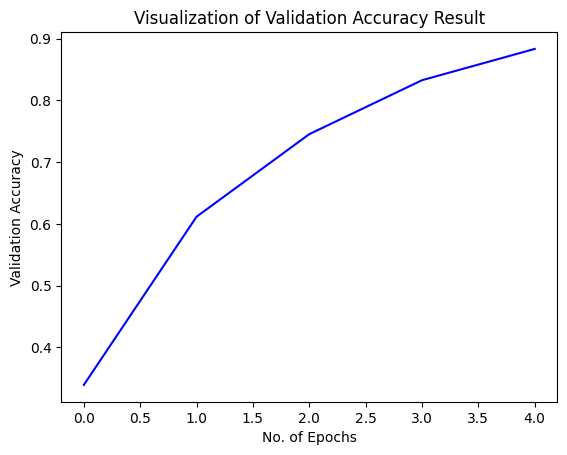

In [15]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [16]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Vegetable_Images/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2630 files belonging to 15 classes.


In [17]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

83/83 [==============================] - 343s 4s/step - loss: 0.3574 - accuracy: 0.8894
Test accuracy: 0.8893536329269409
